# Recommender System

## Methods Used

Two most common types of recommender systems are **Content-Based** and **Collaborative Filtering (CF)**. 

* Collaborative filtering produces recommendations based on the knowledge of users’ attitude to items, that is it uses the "wisdom of the crowd" to recommend items. 
* Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them.

## Collaborative Filtering

In general, Collaborative filtering (CF) is more commonly used than content-based systems because it usually gives better results and is relatively easy to understand (from an overall implementation perspective). The algorithm has the ability to do feature learning on its own, which means that it can start to learn for itself what features to use. 

CF can be divided into **Memory-Based Collaborative Filtering** and **Model-Based Collaborative filtering**.  
 Memory-Based CF by computing cosine similarity and Model-Based CF by using singular value decomposition (SVD).

In this notebook, I will implement an item based similarity recommendation system for movies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
column_names = ["user_id","item_id","rating","timestamp"]

In [3]:
pd.read_csv("u.data")

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116
...,...
99997,880\t476\t3\t880175444
99998,716\t204\t5\t879795543
99999,276\t1090\t1\t874795795
100000,13\t225\t2\t882399156


In [4]:
df = pd.read_csv("u.data",sep="\t",names=column_names)
df

# Movielense dataset

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles

# correlation between item_id and the movie title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [6]:
df = pd.merge(df,movie_titles,on="item_id",how="inner")
df

# combine df and movie_title dataframes into a new dataframe named df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [7]:
len(df)

100003

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [9]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

I am not concerned about the timestamp column not being in a datetime format since I will not be using it. As such, I will now create a new ratings dataframe (ratings_df) which will include the average rating and number of ratings per movie.

In [10]:
df.groupby("title").mean()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [11]:
df.groupby("title").mean()["rating"]

# selecting the average rating column from the df dataframe.

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [12]:
ratings_df = pd.DataFrame(data=df.groupby("title").mean()["rating"])
ratings_df

# creating a dataframe with the average rating per movie

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [13]:
df.groupby("title").count()

# grouping by the title column and counting the other columns in the dataframe.

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
...,...,...,...,...
Young Guns II (1990),44,44,44,44
"Young Poisoner's Handbook, The (1995)",41,41,41,41
Zeus and Roxanne (1997),6,6,6,6


In [14]:
df.groupby("title").count()["rating"]

# selecting the rating column with count number per movie

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [15]:
ratings_df["num of ratings"] = df.groupby("title").count()["rating"]

# adding the number of movie count to the ratings_df

In [16]:
ratings_df

# checking the ratings_df

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


Now, I will explore this data by creating couple histograms using pandas' in-built visualizations. 

<AxesSubplot:>

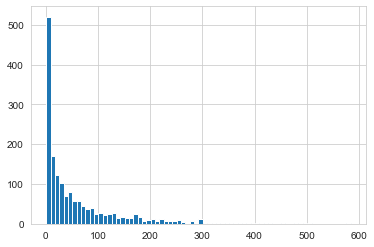

In [17]:
sns.set_style(style="whitegrid")
ratings_df["num of ratings"].hist(bins=70)

# bins =70 since the data is a bit large

Most number of ratings are quite few (i.e: most movies have either 0 or 1 number of ratings). This makes sense, since most people only watch the famous or big hit movies. So, these are going to be the ones with a high number of ratings.

<AxesSubplot:ylabel='Frequency'>

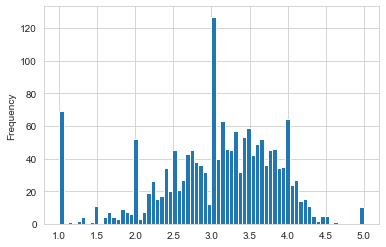

In [18]:
ratings_df["rating"].plot(kind="hist",bins=70)

It can be observed that the there are peaks at the whole numbers (e.g: 1,2,3,etc). This is due to the way people rate movies. These movies probably have few or only one person that rated them and happen to give it a whole number star. Also, it seems that most movies are distributed normally around 3.0-3.5 stars.

There is also a number of outlier movies which were rated with 1 star. This makes sense, since there are probably few  bad movies where only few people watched them. Similarly, there is also a peak at 5 star ratings which will include popular movies or movies which happen to have only one person rate them with 5 stars.

I will now create a jointplot to visualize the number of ratings against the average rating.

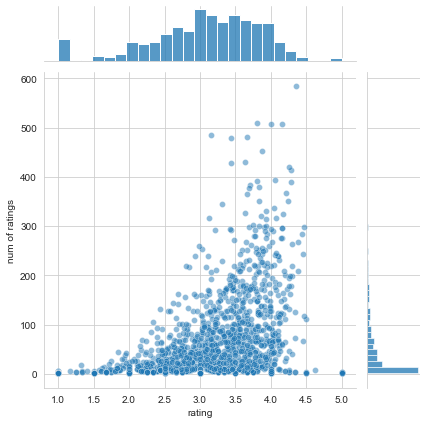

In [19]:
sns.jointplot(x="rating",y="num of ratings",data=ratings_df,alpha=0.5)

It seems that the average rating increases as the movie gets more number of ratings. This makes sense, since a good movie will have more peopel watching it and the more likely people are going to give it a high rating. In contrast, 1 to 2 star movies have very few ratings since they are probably not that great.
There is also an outlier movie which was rated 5 stars but has 1 or very few number of ratings (bottom right-hand corner of the jointplot).

Now, I will create a simple recommendation system based on item similarity.

In [20]:
df.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


In [21]:
ratings_df.head(3)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


I will now create a pivot table to convert the original df dataframe into a matrix form. Hence, naming this new dataframe "moviemat".

In [22]:
moviemat = df.pivot_table(values="rating",index="user_id",columns="title")
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The index indicates the user id and the columns are the movie names. The values are the ratings but there are lots of null values (missing). This was expected since not every user has watched and rated every movie in the orignal dataset.

I will sort the ratings_df dataframe by the number of ratings and select two movies. In this case, Star Wars (1977) and Liar Liar (1997).

In [23]:
ratings_df.sort_values(by="num of ratings",ascending=False)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [24]:
ratings_df.loc[["Star Wars (1977)","Liar Liar (1997)"]]

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Liar Liar (1997),3.156701,485


I will now use the moviemat dataframe to get the individual user ratings for these 2 movies (Nan if they did not rate the movie).

In [25]:
moviemat["Star Wars (1977)"]

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [26]:
moviemat["Liar Liar (1997)"]

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [27]:
starwars_user_ratings = moviemat["Star Wars (1977)"]
liarliar_user_ratings = moviemat["Liar Liar (1997)"]

# setting these user ratings to variables named starwars_user_ratings & liarliar_user_ratings.

In [28]:
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [29]:
type(starwars_user_ratings)

pandas.core.series.Series

In [30]:
liarliar_user_ratings

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

I will now use pd.dataframe.corrwith() as a method to create a pairwise correlation with the "Star Wars (1977)" movie user ratings "starwars_user_ratings". I will set this to a variable named "similar_to_starwars".

Note that I am using corrwith() because this computes the pairwise correlation between rows or columns of one DataFrame with rows or columns of another Series or DataFrame and not with itself such as with the case of corr().
In this case, I am computing the pairwise correlation of "moviemat" (DataFrame) with "starwars_user_ratings" (Series).

In [31]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

C:\Users\issam\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\issam\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

I will now do the same for the movie Liar Liar (1997).

In [32]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

Now, I will create 2 new dataframes to better visualize "similar_to_starwars" and "similar_to_liarliar". I will name these: "corr_starwars" and "corr_liarliar" respectively. Again, these are just the correlation values against the other movies based on the user ratings.

In [33]:
corr_starwars = pd.DataFrame(data=similar_to_starwars,columns=["Correlation"])
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [34]:
corr_starwars.dropna(inplace=True)
corr_starwars

# dropping Nan values from the dataframe

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [35]:
corr_starwars = corr_starwars.join(ratings_df["num of ratings"])
corr_starwars

# I want to join the correlation value and the number of ratings for that movie.
# I will use "join" because title is the index of the dataframe.

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [36]:
corr_starwars[corr_starwars["num of ratings"] > 100].sort_values(by="Correlation",ascending=False)

# filter out movies that have less than 100 reviews and sort by highest correlation value.

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [37]:
corr_starwars[corr_starwars["num of ratings"] > 100].sort_values(by="Correlation",ascending=False).head(5)

# selecting 4 best correlated movies to Star Wars (1977)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Undoubtedly, "Star Wars (1977)" has a perfect correlation with itself. But, it is also seen that the highest correlated movies are also other Star Wars movies, such as: "Empire Strikes Back (1980)" and "Return of the Jedi (1983)".

There is also an Indiana Jones movie "Raiders of the Lost Ark (1981)" which would probably be of interest to users who very much enjoyed watching "Star Wars (1977)".

Notice that there is a significant drop in correlation for "Austin Powers" since this is a comedy. So, a user may or may not like it if they saw "Star Wars (1977)". But, one of the reasons why it shows in the top 4 movies (even though 0.377 is not that high) is because it is also a very popular movie.

With many recommender system, popular items tend to be recommended to other users who liked other popular items.

Now, I will repeat the same steps for the Liar Liar (1997) movie.

In [38]:
corr_liarliar = pd.DataFrame(data=similar_to_liarliar,columns=["Correlation"])
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
...,...
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016
Zeus and Roxanne (1997),-0.500000


In [39]:
corr_liarliar.dropna(inplace=True)
corr_liarliar

# dropping Nan values

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016


In [40]:
corr_liarliar = corr_liarliar.join(ratings_df["num of ratings"])
corr_liarliar

# joining the correlation and number of ratings into the corr_liarliar dataframe based on the movie (index)

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [41]:
corr_liarliar[corr_liarliar["num of ratings"] > 100].sort_values(by="Correlation",ascending=False)

# filtering out movies with less than 100 reviews and sorting by the highest correlation value.

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194


In [42]:
corr_liarliar[corr_liarliar["num of ratings"] > 100].sort_values(by="Correlation",ascending=False).head()

# selecting 4 best correlated movies to Liar Liar (1997)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


Again, "Liar Liar (1997)" has a perfect correlation with itself which makes sense. 
Note that the majority of the correlations are lower than 0.5 but it is interesting to see that this "recommender system" also indicated "The Mask (1994)" as being a good match since these are both comedies that were produced in the 90's and starred by Jim Carrey.

The threshold for the minimum number of ratings was randomly selected (100) but this could be changed to fine-tune the output of this simple recommender system. Hence, filtering out any movies that do not make sense.